<a href="https://colab.research.google.com/github/weasel-codes/google-colab/blob/coding/NeuralNetworkMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load Inbuilt Dataset from Keras

In [1]:
from keras.datasets import mnist
(X_Train,Y_Train),(X_Test,Y_Test)=mnist.load_data()

# Print size of Train and Test Dataset

In [2]:
print("Train Data : \t", X_Train.shape)
print("Test Data : \t", Y_Train.shape)
print("Train Output : \t", X_Test.shape)
print("Test Output : \t", Y_Test.shape)

Train Data : 	 (60000, 28, 28)
Test Data : 	 (60000,)
Train Output : 	 (10000, 28, 28)
Test Output : 	 (10000,)


# Visualize Data

Output Value :  5


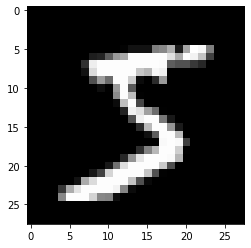

In [3]:
from matplotlib import pyplot as plt
print("Output Value : ", Y_Train[0])
plt.imshow(X_Train[0],cmap='gray')
plt.show()


# Creating categorical training Output

In [4]:
from keras.utils import np_utils
Y_Train=np_utils.to_categorical(Y_Train)
Y_Test=np_utils.to_categorical(Y_Test)

# Normalizaing Gray scale value

In [5]:
X_Train=X_Train/255
X_Test=X_Test/255
print(X_Train[5,15:20,15:20])

[[0.94901961 0.98823529 0.98823529 0.90588235 0.45882353]
 [0.81568627 0.98823529 0.98823529 0.98823529 0.98823529]
 [0.99215686 0.96862745 0.50588235 0.67843137 0.98823529]
 [0.84705882 0.25490196 0.         0.05490196 0.28235294]
 [0.11372549 0.         0.         0.         0.        ]]


# Creating *ANN* and Configuring Parameters

In [6]:
from keras.models import Sequential
from keras.layers import Dense,Flatten
from keras.optimizers import SGD
# Training the ANN on the Training set
batches = [1, 2, 4, 6, 16, 32, 64]
learning_rate = [0.01, 0.05, 0.1, 0.2, 0.4, 0.8]
hidden_layers = [1, 2, 4, 8]

## Experiments with batch size

In [7]:
batch_accuracy = {}

for batch in batches :
  # for batch in batches :
  ann=Sequential()
  ann.add(Flatten(input_shape=(28,28)))
  ann.add(Dense(100,activation='relu'))
  ann.add(Dense(100,activation='relu'))
  ann.add(Dense(10,activation='softmax'))

  # Compile model
  sgd = SGD(lr=0.01)
  ann.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

  print("################################\n for Batch size = ", batch, " and epoch = ", 10)
  ann.fit(X_Train, Y_Train, batch_size = batch, epochs = 10)
  batch_accuracy[batch]=max(ann.history.history['accuracy'])


################################3
 for Batch size =  1  and epoch =  10
Epoch 1/10
60000/60000 [==============================] - 55s 914us/step - loss: 0.2252 - accuracy: 0.9301
Epoch 2/10
60000/60000 [==============================] - 54s 892us/step - loss: 0.1052 - accuracy: 0.9682
Epoch 3/10
60000/60000 [==============================] - 56s 927us/step - loss: 0.0772 - accuracy: 0.9756
Epoch 4/10
60000/60000 [==============================] - 56s 926us/step - loss: 0.0623 - accuracy: 0.9800
Epoch 5/10
60000/60000 [==============================] - 55s 919us/step - loss: 0.0491 - accuracy: 0.9847
Epoch 6/10
60000/60000 [==============================] - 54s 906us/step - loss: 0.0437 - accuracy: 0.9859
Epoch 7/10
60000/60000 [==============================] - 55s 920us/step - loss: 0.0372 - accuracy: 0.9883
Epoch 8/10
60000/60000 [==============================] - 56s 928us/step - loss: 0.0329 - accuracy: 0.9893
Epoch 9/10
60000/60000 [==============================] - 55s 921us/step

Max accuracy for  1  :  0.9910500049591064
Max accuracy for  2  :  0.9940833449363708
Max accuracy for  4  :  0.9934333562850952
Max accuracy for  6  :  0.9900500178337097
Max accuracy for  16  :  0.9800999760627747
Max accuracy for  32  :  0.9645333290100098
Max accuracy for  64  :  0.9487500190734863


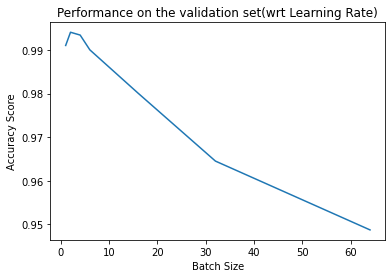

In [27]:
#Printing max accuracies of all 
for key in batch_accuracy.keys() :
  print("Max accuracy for ", key ," : ", batch_accuracy[key])

plt.plot(list(batch_accuracy.keys()), list(batch_accuracy.values()))
plt.ylabel('Accuracy Score')
plt.xlabel('Batch Size')
plt.title('Performance on the validation set(wrt Learning Rate)')
plt.show()

## Experiment with learning rate

In [11]:
learning_rate_accuracy = {}

for rate in learning_rate :
  # for batch in batches :
  ann=Sequential()
  ann.add(Flatten(input_shape=(28,28)))
  ann.add(Dense(100,activation='relu'))
  ann.add(Dense(100,activation='relu'))
  ann.add(Dense(10,activation='softmax'))

  # Compile model
  sgd = SGD(lr=rate)
  ann.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

  print("################################3\n for Learning rate = ", rate, " and epoch = ", 10)
  ann.fit(X_Train, Y_Train, batch_size = 40, epochs = 10)
  learning_rate_accuracy[rate]=max(ann.history.history['accuracy'])

################################3
 for Learning rate =  0.01  and epoch =  20
Epoch 1/10
1500/1500 [==============================] - 2s 2ms/step - loss: 0.7086 - accuracy: 0.8178
Epoch 2/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3257 - accuracy: 0.9065
Epoch 3/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2737 - accuracy: 0.9209
Epoch 4/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2405 - accuracy: 0.9301
Epoch 5/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2151 - accuracy: 0.9380
Epoch 6/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.1942 - accuracy: 0.9438
Epoch 7/10
1500/1500 [==============================] - 2s 2ms/step - loss: 0.1772 - accuracy: 0.9484
Epoch 8/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.1628 - accuracy: 0.9526
Epoch 9/10
1500/1500 [==============================] - 2s 2ms/step - loss: 0.1507 - accuracy: 0.9560
Epoc

Max accuracy for  0.01  :  0.9589166641235352
Max accuracy for  0.05  :  0.9883333444595337
Max accuracy for  0.1  :  0.9922833442687988
Max accuracy for  0.2  :  0.9947500228881836
Max accuracy for  0.4  :  0.9901333451271057
Max accuracy for  0.8  :  0.9690166711807251


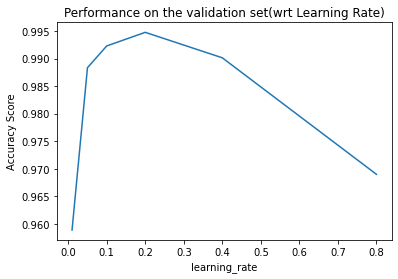

In [22]:
# Learning Rate wise accuracies
#Printing max accuracies of all 
for key in learning_rate_accuracy.keys() :
  print("Max accuracy for ", key ," : ", learning_rate_accuracy[key])

plt.plot(list(learning_rate_accuracy.keys()), list(learning_rate_accuracy.values()))
plt.ylabel('Accuracy Score')
plt.xlabel('learning_rate')
plt.title('Performance on the validation set(wrt Learning Rate)')
plt.show()

## Experiment with number of Hidden Layers

In [17]:
hidden_layers_accuracy = {}

# for batch in batches :
for i in hidden_layers :
  print("################################\n for hidden layers = ", i, " and epoch = ", 10, " and hidden layers : " , i)
  ann=Sequential()
  j = 0
  ann.add(Flatten(input_shape=(28,28)))
  while j < i :
    ann.add(Dense(100,activation='relu'))
    j=j+1
  ann.add(Dense(10,activation='softmax'))
  ann.summary()

  # Compile model
  sgd = SGD(lr=0.01)
  ann.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
  ann.fit(X_Train, Y_Train, batch_size = 40, epochs = 10)
  hidden_layers_accuracy[i]=max(ann.history.history['accuracy'])


################################
 for hidden layers =  1  and epoch =  10  and hidden layers :  1
Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_21 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_62 (Dense)             (None, 100)               78500     
_________________________________________________________________
dense_63 (Dense)             (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.7231 - accuracy: 0.8209
Epoch 2/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3590 - accuracy: 0.9001
Epoch 3/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0

Max accuracy for  1  :  0.9475833177566528
Max accuracy for  2  :  0.9608833193778992
Max accuracy for  4  :  0.9718166589736938
Max accuracy for  8  :  0.9790833592414856


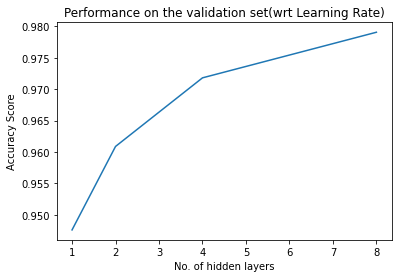

In [26]:
# No. of hidden layer wise accuracies
#Printing max accuracies of all 
for key in hidden_layers_accuracy.keys() :
  print("Max accuracy for ", key ," : ", hidden_layers_accuracy[key])

plt.plot(list(hidden_layers_accuracy.keys()), list(hidden_layers_accuracy.values()))
plt.ylabel('Accuracy Score')
plt.xlabel('No. of hidden layers')
plt.title('Performance on the validation set(wrt Learning Rate)')
plt.show()

# Generate confusion Matrix out of best features

In [8]:
print("For hyperparameters : batch size : 4, learning_rate = 0.2, no. of epochs : 10, hidden layers = 8")
ann=Sequential()
ann.add(Flatten(input_shape=(28,28)))
ann.add(Dense(100,activation='relu'))
ann.add(Dense(100,activation='relu'))
ann.add(Dense(10,activation='softmax'))

# Compile model
sgd = SGD(lr=0.2)
ann.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
ann.fit(X_Train, Y_Train, batch_size = 40, epochs = 10)

For hyperparameters : batch size : 4, learning_rate = 0.2, no. of epochs : 10, hidden layers = 8
Epoch 1/10
1500/1500 [==============================] - 2s 2ms/step - loss: 0.2522 - accuracy: 0.9236
Epoch 2/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.1066 - accuracy: 0.9671
Epoch 3/10
1500/1500 [==============================] - 2s 2ms/step - loss: 0.0775 - accuracy: 0.9758
Epoch 4/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0605 - accuracy: 0.9808
Epoch 5/10
1500/1500 [==============================] - 2s 2ms/step - loss: 0.0492 - accuracy: 0.9842
Epoch 6/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0403 - accuracy: 0.9864
Epoch 7/10
1500/1500 [==============================] - 2s 2ms/step - loss: 0.0310 - accuracy: 0.9904
Epoch 8/10
1500/1500 [==============================] - 2s 2ms/step - loss: 0.0265 - accuracy: 0.9911
Epoch 9/10
1500/1500 [==============================] - 2s 2ms/step - loss: 0.0226 - ac

# Testing Test data

In [9]:
# from sklearn.metrics import confusion_matrix, accuracy_score
# cm = confusion_matrix(new_test_target, new_test_data)
# print(cm)
# accuracy_score(new_test_target, new_test_data)
import numpy as np
Y_Pred = ann.predict(X_Test)
print(Y_Test.shape)
print(Y_Pred.shape)

(10000, 10)
(10000, 10)


# Create Confusion Matrix

In [10]:
from sklearn.metrics import confusion_matrix, accuracy_score
Y_Pred = [np.argmax(i) for i in Y_Pred]
Y_Test = [np.argmax(i) for i in Y_Test]

Accuracy in Test Data :  0.9785


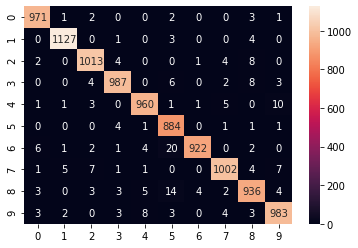

In [13]:
cm = confusion_matrix(Y_Test, Y_Pred)
print("Accuracy in Test Data : ", accuracy_score(Y_Test, Y_Pred))

import seaborn as sns
sns.heatmap(cm,  annot=True, fmt="d")